# Traffic Crash Data Analysis with Pandas, Python, Google Colab, and Matplotlib

This repository provides a step-by-step tutorial on performing data analysis using a real-world dataset of traffic crashes. We'll leverage the power of Python's pandas library for data manipulation, Matplotlib for visualization, and Google Colab for an interactive coding environment.

## Project Overview

This tutorial walks you through the process of:
- Loading a large CSV dataset into a pandas DataFrame.
- Identifying missing values across the dataset.
- Initial data inspection and handling common issues like mixed data types.
- Extracting meaningful information, such as crash counts by year and crash count by year and weather conditions.
- Visualizing data trends using Matplotlib to gain insights.


## Tools Used

- **Python**: The core programming language.
- **Pandas**: A powerful data manipulation and analysis library.
- **Matplotlib**: A comprehensive library for creating static, animated, and interactive visualizations.
- **Google Colab**: A cloud-based Jupyter notebook environment that requires no setup to use and offers free access to computing resources.

## Dataset

The data used in this tutorial is the "Traffic Crashes - Crashes" dataset, which is publicly available. You can download the latest version of this dataset from the City of Chicago's data portal:

[Download Traffic Crashes - Crashes Dataset](https://data.cityofchicago.org/d/85ca-t3if)

### How to get the data:
1. Visit the link above.
2. Look for the 'Export' or 'Download' options on the dataset page.
3. Download the data in CSV format.
4. If you're using Google Colab, upload the `.csv` file to your Google Drive and ensure you mount your Drive in Colab to access it (as demonstrated in the code).

## How to Use This Tutorial

1.  **Clone this repository** to your local machine or open it directly in Google Colab.
2.  **Download the dataset** as instructed above and place it where your Colab notebook can access it (e.g., your Google Drive).
3.  **Follow the code cells sequentially**: Each code cell is designed to build upon the previous one, guiding you through the data analysis process.
4.  **Experiment**: Feel free to modify the code, try different analyses, and explore other aspects of the dataset!

## Importing Pandas and Loading CSV

In [79]:
# Most people use the 'pd' alias for pandas for ease of use.
import pandas as pd

In [80]:
# You can load your file directly to your Google Colab environment, but I loaded mine to Google Drive and provided the path to it.
# I also assign 'df' to make sure it is easy to call.
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Traffic_Crashes.csv', low_memory=False)

## Data Inquiries

In [81]:
# this code will give you a sample on the data you are working with. Specifically head() function lists the top 5 rows.
df.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,a15266915379e2ee2439548d7460f29d185a18f97e4bdd...,Y,12/07/2025 03:40:00 AM,45,NO CONTROLS,NO CONTROLS,SNOW,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,DIVIDED - W/MEDIAN BARRIER,...,0.0,0.0,2.0,0.0,3,1,12,41.818752,-87.596109,POINT (-87.59610943105 41.818751815122)
1,6bb856cb0a365fc01d387327d110f5f31db3d37014b94e...,NaN,12/07/2025 03:20:00 AM,30,NO CONTROLS,NO CONTROLS,SNOW,DARKNESS,PARKED MOTOR VEHICLE,ONE-WAY,...,0.0,0.0,1.0,0.0,3,1,12,41.895313,-87.722261,POINT (-87.722261203591 41.895313086294)
2,2c14cdf8733affd2dcb740f61b1ccfa91b526d2d3027aa...,NaN,12/07/2025 03:15:00 AM,30,NO CONTROLS,NO CONTROLS,SNOW,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,NOT DIVIDED,...,NaN,NaN,NaN,NaN,3,1,12,41.816047,-87.606548,POINT (-87.606547971177 41.816046839974)
3,152896ecb53957ff5a8435680bf30a2c3ca91c9ce3fda8...,NaN,12/07/2025 03:00:00 AM,20,NO CONTROLS,NO CONTROLS,SNOW,"DARKNESS, LIGHTED ROAD",TURNING,NOT DIVIDED,...,0.0,0.0,2.0,0.0,3,1,12,41.959199,-87.730923,POINT (-87.730923030587 41.959199363355)
4,f90d380de5e8821f520eb2d631644d6a121711709833ca...,NaN,12/07/2025 02:15:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,SNOW,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,NOT DIVIDED,...,0.0,0.0,1.0,0.0,2,1,12,41.895665,-87.706411,POINT (-87.706411477325 41.895664552516)


In [82]:
# Shape returns a tuple representing the dimensionality of our DataFrame.
# First value is # of rows and second one is columns. In our case, 1m+ rows and 48 columns.
df.shape

(1008744, 48)

In [83]:
# this code gets sample data from the location of 55 and prints it. This is where I am trying to understand the data I am working with.
sampledata = df.iloc[55]
print(sampledata)

CRASH_RECORD_ID                  e26e1adce6d83266521a5213c10d6622833df8ea0ed62b...
CRASH_DATE_EST_I                                                                 Y
CRASH_DATE                                                  12/06/2025 06:46:00 PM
POSTED_SPEED_LIMIT                                                              10
TRAFFIC_CONTROL_DEVICE                                                 NO CONTROLS
DEVICE_CONDITION                                                       NO CONTROLS
WEATHER_CONDITION                                                            CLEAR
LIGHTING_CONDITION                                          DARKNESS, LIGHTED ROAD
FIRST_CRASH_TYPE                                                             ANGLE
TRAFFICWAY_TYPE                                                        PARKING LOT
LANE_CNT                                                                       NaN
ALIGNMENT                                                       STRAIGHT AND LEVEL
ROAD

In [84]:
# Similar to SQL's IS NULL, this statement can find whether the column has any null values.
df['STREET_DIRECTION'].isnull().sum()

np.int64(4)

In [85]:
# What if I want to check for null values in all columns? Here is how:
null_counts = df.isnull().sum()

# To display columns with null values and their counts, conditional statement below will help and also print the results.
columns_with_nulls = null_counts[null_counts > 0]

if not columns_with_nulls.empty:
    print("Columns with null values:")
    print(columns_with_nulls)
else:
    print("No columns have null values.")

Columns with null values:
CRASH_DATE_EST_I                  935504
LANE_CNT                          809712
REPORT_TYPE                        33364
INTERSECTION_RELATED_I            776918
NOT_RIGHT_OF_WAY_I                963457
HIT_AND_RUN_I                     692193
STREET_DIRECTION                       4
STREET_NAME                            1
BEAT_OF_OCCURRENCE                     5
PHOTOS_TAKEN_I                    994422
STATEMENTS_TAKEN_I                984763
DOORING_I                        1005501
WORK_ZONE_I                      1003258
WORK_ZONE_TYPE                   1004554
WORKERS_PRESENT_I                1007336
MOST_SEVERE_INJURY                  2197
INJURIES_TOTAL                      2183
INJURIES_FATAL                      2183
INJURIES_INCAPACITATING             2183
INJURIES_NON_INCAPACITATING         2183
INJURIES_REPORTED_NOT_EVIDENT       2183
INJURIES_NO_INDICATION              2183
INJURIES_UNKNOWN                    2183
LATITUDE                       

## Manipulation

In [86]:
# Above I see that the CRASH_DATE_EST_I column has no meaningful data point that I can work on so I am going to delete that column.
# Use axis 1 for columns and 0 for rows.
df = df.drop(['CRASH_DATE_EST_I'], axis=1)

In [87]:
# Now that I have a better understanding of the data, I want to create a report listing number of crashes each year.
#However, I have a data type problem. So I need to convert the 'CRASH_DATE' column to datetime objects.
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'])

# Now it is time to extract the year from the 'CRASH_DATE' column where I also assign a new column name called 'CRASH_YEAR'
df['CRASH_YEAR'] = df['CRASH_DATE'].dt.year

# a new variable here is needed to group by year and count the crashes
crashes_by_year = df.groupby('CRASH_YEAR')['CRASH_YEAR'].count()

# Add the alias (new name) to the resulting Series. This part is optional. I just think it makes it output's look nicer.
crashes_by_year.name = 'Total Crashes'

# Display the results and for better visibility I added the thousand seperator comma inbetween.
print(crashes_by_year.map('{:,}'.format))

CRASH_YEAR
2013          2
2014          6
2015      9,831
2016     44,297
2017     83,786
2018    118,951
2019    117,764
2020     92,095
2021    108,766
2022    108,411
2023    110,753
2024    112,052
2025    102,030
Name: Total Crashes, dtype: object


In [88]:
# let's do another one. Group by year and weather condition, then count number of rows in my new column 'CRASH_YEAR'.
# I know this method will work because there are no null values on this series. So each row is a unique crash.
crashes_by_year_weather = df.groupby(['CRASH_YEAR', 'WEATHER_CONDITION'])['CRASH_YEAR'].count()

print(crashes_by_year_weather)

CRASH_YEAR  WEATHER_CONDITION     
2013        CLEAR                        2
2014        CLEAR                        3
            RAIN                         2
            UNKNOWN                      1
2015        CLEAR                     7474
                                      ... 
2025        RAIN                      6190
            SEVERE CROSS WIND GATE      11
            SLEET/HAIL                 108
            SNOW                      2916
            UNKNOWN                   8030
Name: CRASH_YEAR, Length: 122, dtype: int64


In [89]:
# Notice how above it doesn't give you the full report. Let's cover how to export the crashes_by_year data to a CSV file. You simply write .tocsv . You can then download on the left hand side
crashes_by_year.to_csv('crashes_by_year_data.csv')
print("Data saved as 'crashes_by_year_data.csv'")

Data saved as 'crashes_by_year_data.csv'


## Importing Matplotlib and Plotting

In [90]:
import matplotlib.pyplot as plt

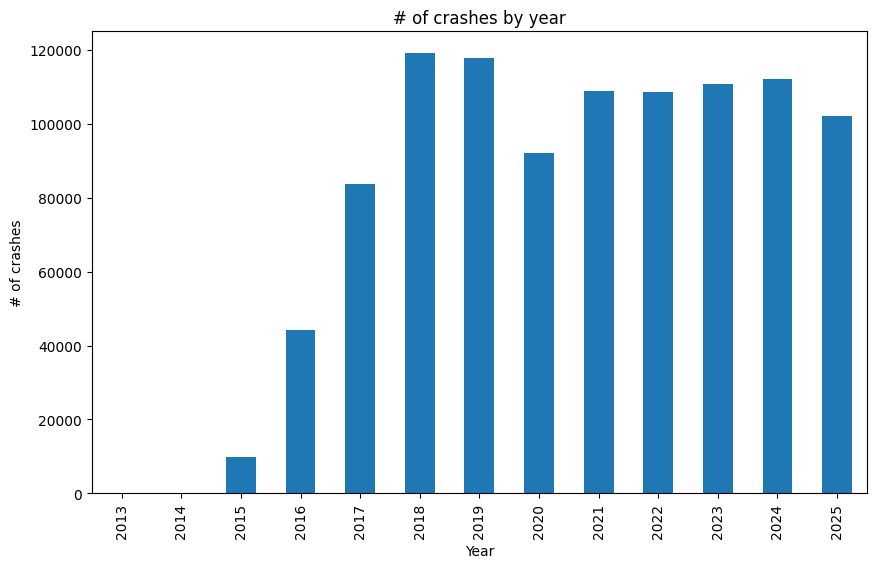

In [91]:
# First let's plot our first series report, 'crashes by year'
crashes_by_year.plot(kind='bar', figsize=(10, 6))
plt.title('# of crashes by year')
plt.xlabel('Year')
plt.ylabel('# of crashes')
plt.show()

# Save the plot to a file. Please remove the #$ below to run this code.
#$ plt.savefig('crashes_by_year_plot.png')
#$ print("Plot saved as 'crashes_by_year_plot.png'")

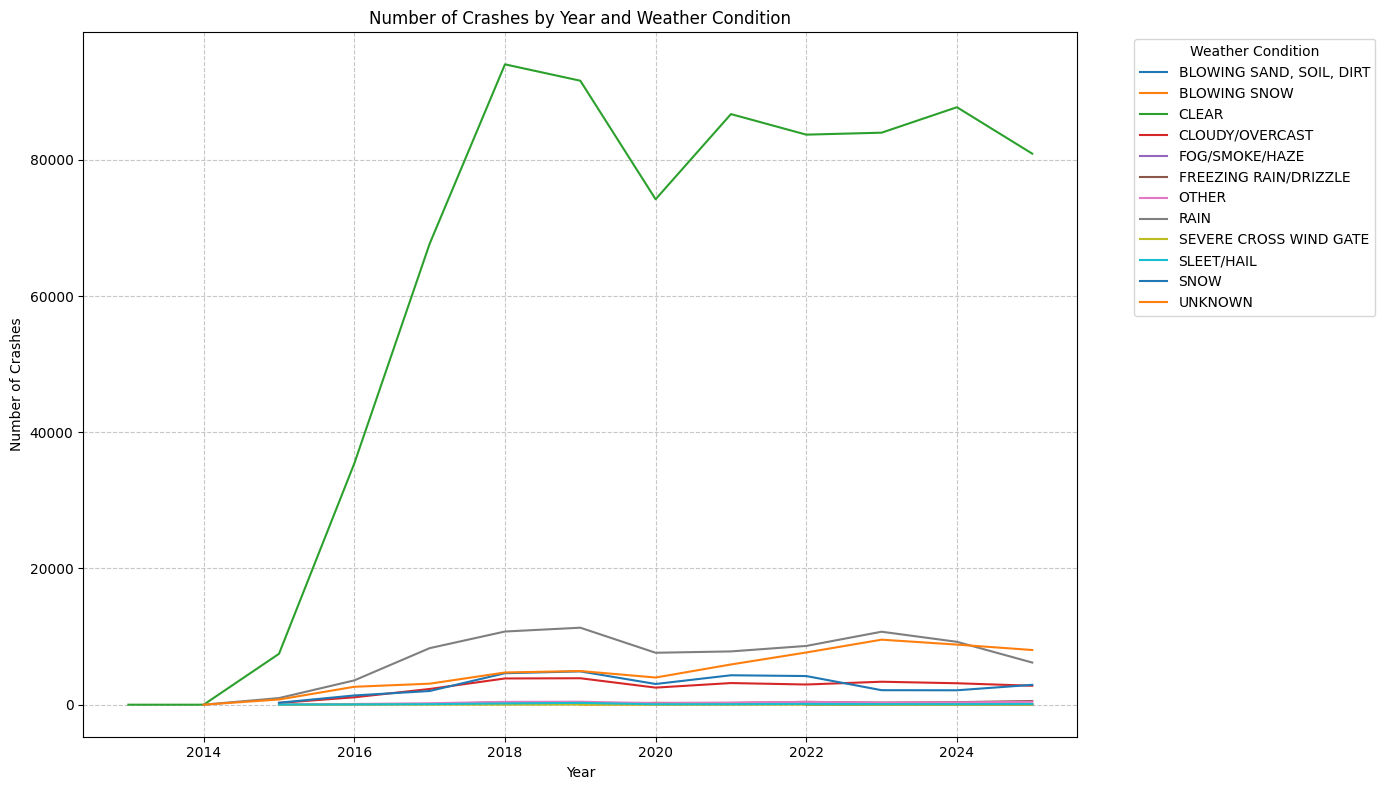

In [92]:
# To plot crashes_by_year_weather effectively, we can unstack it to have weather conditions as separate columns.
# This allows us to plot each weather condition's trend over the years.

crashes_by_year_weather_df = crashes_by_year_weather.unstack(level='WEATHER_CONDITION')

# Now, let's plot this. The .plot() method on a DataFrame will plot each column as a separate line.
plt.figure(figsize=(14, 8)) # Adjust figure size for better readability. Play with this one, you'll have fun.
crashes_by_year_weather_df.plot(kind='line', ax=plt.gca())

plt.title('Number of Crashes by Year and Weather Condition')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.legend(title='Weather Condition', loc='best', bbox_to_anchor=(1.05, 1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

# If you want to save this plot, just remove the #$ signs below and rerun:
#$ plt.savefig('crashes_by_year_weather_plot.png')
#$ print("Plot saved as 'crashes_by_year_weather_plot.png'")

Pretty crazy that most crashes happen on clear weather conditions.